<h1> Entanglement based Quantum Key Distribution: E91 Protocol</h1>


<h2> Abstract</h2>

In this notebook, we simulate an entanglement based quantum key distribution (the E91) protocol in quantum computer. We demonstrate that the secure key rate depends on pair of qubits selected to run the experiment, in the sense that the pair of qubit with lower two-qubit error provide higher secure key rate independent of eavesdropper's interference.

<h2>Introduction</h2>
Quantum key distribution (QKD) is a direct application of quantum mechanics. It consists of generating a secret key using quantum mechanics principles, such as entanglement, no-cloning theorem, and non-locality of quantum particles. The security of QKD relies on those principles in comparison to classical key distribution whose security relies on complexity. QKD was first introduced by Bennett and Brassard in 1984, with their famous BB84 protocol. This led to several other protocols later which includes, the E91 (Ekert 1991), the B92 (Bennett 1992), etc. The latest are entanglement based protocols, while the former is a prepare-and-measure protocol. 

In this project however, we focus on E91 protocol, using quantum computers. In this protocol, the legitimate users (Ange the sender and Bill the receiver) share entangled qubits (photonic qubits) prepared on the sender's side (i.e. by Ange). We assume that Ange's and  Bill's quantum labs are physically separated, but linked by a quantum channel, which can be under the control of an untrusted third party (i.e. an eavesdropper Eve). We also assume that this quantum channel sends qubits to their respective  quantum computers that are  used to measure the  state of the qubit, and generate by the way a secret key. To assure the secrecy of the protocol, the legitimate users compute the Clauser-Horn-Shimony-Holt (CHSH) inequality based on their respective measurement results, whose value should determine whether the qubits exchanged through the quantum channel were subject to interference or not. The latest shows therefore a high importance to determine whether the communication between legitimate user is been listened by Eve or not, since the action of Eve on the qubits will inevitably introduce errors that modify the correlation. Thus this protocol sounds very interesting and promising for secure communication with recent developments of quantum computers, with error corrected qubits. That means one is able to prepare entangled qubits with long enough coherence time and also determine (or measure) its exact state with a high probability.

This notebook is structured as followed: in section 1, we discuss the algorithm in detail, in section 2, we develop the strategy to test for eavesdropping (i.e. the CHSH inequality). The experimental result is presented in section 3, where we first implement the algorithm on ideal conditions (i.e. no background noise, no eavesdropper's interference), we secondly implement the algorithm without background noise, but with an eavesdropper, and finally the main result on real conditions (i.e. real quantum hardware and eavesdropper interference).  


<h2> 1. The Algorithm</h2>
In this project, we assume the source of entangled qubits on the sender's quantum lab, connected to the receiver lab through an unauthenticated quantum channel. The algorithm to generate a secure key is as follows:

1 - Ange prepares $N$ pairs of maximally entangled qubits, keeps qubit A and sends qubit B to bill through the quantum channel, sensitive to eavesdropping and noise. 

2- Both parties randomly select a basis to measure their respective qubits ($\{X$, $\frac{1}{\sqrt{2}}(X + Z)$, $Z\}$ for Ange and $\{\frac{1}{\sqrt{2}}(X + Z)$, $Z$, $\frac{1}{\sqrt{2}}(-X + Z)\}$ for Bill).

3- They record their respective measurement results as a bit string ($a = \{0,1\}^N$, and $b = \{0,1\}^N$ for Ange and Bill respectively. It is worth mentioning that the measurement basis in step 2 are assumed as an observable to measure in maximally entangled state, i.e. if $X$ is the selected measurement basis on Ange side and $\frac{1}{\sqrt{2}}(X + Z)$ on Bill side, then the corresponding bit is obtained by taking $\bra \Psi X \otimes \frac{1}{\sqrt{2}}(X + Z) \ket \Psi$. Measuring this quantity in the computational basis will lead to either of the following bit strings, '00', '01', '10' or '11', depending on the state $\ket{\Psi}$, where the last bit in each bit string refers to Ange measurement result and the fist to Bill's one.

4- They thus employ a classical channel to communicate to each other their respective measurement basis choices. This step is known as measurement basis reconciliation, which consists of discarding from their respective results those bits that measurement basis do not coincide. It is important to note that in an ideal situation (no noise, neither eavesdropper interference), their remaining bit strings should be perfectly correlated, identical and can be used as a key for secret communication with high privacy. But in real situation this not the case, thus they need extra mechanisms to correct errors and determine whether or not someone interfered with their exchanged qubits.

5- Based on their respective measurement results, they compute the correlation value, which if equal to $2\sqrt{2}$ in absolute value, they can be sure that no noise or no one interfered with their communication process, if not they repeat the procedure from step 1 in different set up. 

6 - Both parties sacrify half of their respective bit strings to approximate the quantum bit error rate (i.e. the ratio of the number of bits that differ with the total number of bits), since even though there might not be anyone interfering with their communication process there is always high probability of error due to background noise. If the value of the latest is too high, they abort the procedure if not the continue. In general if the  quantum bit error rate is above some threshold value it implies the quantum channel is too noisy or someone interfered with the exchanged qubits.

<h2>2. Testing the eavesdropper by CHSH inequality</h2>

The CHSH inequality is employed to experimentally demonstrate Bell's theorem, which states that ''local hidden variables theories do not account for some consequences of quantum mechanics''. The violation of that inequality demonstrates that local hidden variable theory is incompatible with quantum mechanics. In particular, local hidden variables theory shows that the quantum correlation is always less than or equal to 2. The violation of  that inequality can be used to proof entanglement, i.e. $|C| \leq 2\sqrt{2}$, for a maximally entangled state. It is therefore consistent to employ this inequality demonstrate security of E91 protocol, because its violation will certify that someone interfered with the exchanged qubit given that the measurement by a third party collapses entanglement, and thus the correlation reduce to classical correlation, i.e. $|C| \leq 2$, rather than  $|C| \leq 2\sqrt{2}$ as expected. 

Indeed, if $\{a_0,a_1\}$ is the measurement outcome of Ange $\{b_0,b_1\}$ that of Bill, then the CHSH inequality reads:

$$ |E(a_0,b_0) - E(a_0,b_1) + E(a_1,b_0) +E(a_1,b_1)| \leq 2\sqrt{2}.$$

In other words, if $A$ = $\{X$, $Z\}$ and $B$ =$\{W=\frac{1}{\sqrt{2}}(X + Z)$, $V=\frac{1}{\sqrt{2}}(-X + Z)\}$ are respectively the measurement basis of Ange and Bill, the CHSH inequality reads:
$$ |\bra \Psi X \otimes W \ket \Psi -\bra \Psi X \otimes V \ket \Psi +\bra \Psi Z \otimes W \ket \Psi+\bra \Psi Z \otimes V \ket \Psi| \leq 2\sqrt{2}. $$

Here in particular if we assume that the qubit pair are prepared in the Bell maximally entangled state $\ket \Psi = \frac{1}{\sqrt{2}}(\ket {01} - \ket {10})$, it is easy to check that $|C| = 2\sqrt{2}$. Therefore, our mission in this work will be to study how this quantity is affected by noise and/or eavesdropper's actions. But let's first demonstrate how to evaluate $|C|$ based on measurement outcomes. For this purpose, let's assume the measurement basis as an observable $O$ to be measured. In the spectral decomposition, this observable can be written as $O = \sum_j \lambda_j \ket {e_j}\bra {e_j}$, where $\lambda_j$ are the eigenvalues and $\ket {e_j}$  the eigenvectors, thus one has:
$$ \bra \Psi O \ket \Psi = \sum_j \lambda_j \langle \Psi|  {e_j}\rangle  \langle  {e_j} | \Psi  \rangle = \sum_j \lambda_j P(\lambda_j),$$ 
with $P(\lambda_j)$ the probability to measure the eigenvalues $\lambda_j$. It comes out naturally that 
$$ \bra \Psi O_1 \otimes O_2 \ket \Psi = \sum_{jk} \lambda_j\lambda_k   P(\lambda_j,\lambda_k),$$ 
where $P(\lambda_j,\lambda_k)$ is the joint probability to measure the eigenvalues $\lambda_j$ and $\lambda_k$ for observables $O_1$ and $O_2$ respectively. In this particular case where the measurement basis of Ange and Bill are well known to be $A$ = $\{X, Z\}$ and $B$ =$\{W=\frac{1}{\sqrt{2}}(X + Z)$, $V=\frac{1}{\sqrt{2}}(-X + Z)\}$ respectively, the corresponding eigenvalues of each of the observable are always $1$ and $-1$, therefore, 
$$ \bra \Psi A_j \otimes B_k \ket \Psi = P_{jk}(-1,-1) - P_{jk}(-1,1) - P_{jk}(1,-1) + P_{jk}(1,1).$$

Each probability term on the right hand side is determined by accounting the number of times $\lambda_j$ and $\lambda_k$ were measured given that the bases $A_j$ and $B_k$ were selected, i.e. if the experiment consists of sharing $N$ entangled qubit-pairs, thus,
$$P(\lambda_j,\lambda_k) = \frac{n(A_j|=\lambda_j, B_k|=\lambda_k)}{ N(A_j, B_k)},$$ 

For example, to be more precise if $N$ qubit-pairs are shared between Ange and Bill, and during the procedure they select respectively $Z$ and $W$ bases $M$ times, the probabilities are:
$ P(-1,-1) = \frac{n(-1,-1)}{M}$, $P(1,-1) = \frac{n(1,-1)}{M}$, $P(-1,1) = \frac{n(-1,1)}{M}$ and $P(1,1) = \frac{n(1,1)}{M}$.

<h2> 3. Experiment: Simulation of E91 on quantum hardwards</h2>

<h3> 3.1. Simulation on ideal conditions: without noise neither eavesdropper interference</h3>
Here we assume having an authenticated quantum channel through out which the qubits are being exchanged during the experiment. We also assume a fault tolerant quantum hardware to measure the state of qubit. This is done by considering a noise-free quantum backend (qiskit Aer simulator). It is known that with such backend we don't escape shot-noise, but we assume its effect negligible. Under these circumstances, the experiment is the following:


<h3> a) Import the necessary packages and check for quantum hardware properties</h3>

In [1]:
from qiskit import QuantumRegister, ClassicalRegister,QuantumCircuit
import numpy as np
import random
from qiskit.visualization import circuit_drawer, plot_histogram
import matplotlib.pyplot as plt
from qiskit_aer import AerSimulator
from qiskit.transpiler import generate_preset_pass_manager
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime.fake_provider import FakeFez

In [2]:
# Comment the next two command lines if no acces to real quantum hardware is granted
service = QiskitRuntimeService(channel ="ibm_quantum_platform", token= 'Your API'
                              , instance = 'Your CRN')
backend = service.least_busy(simulator=False, operational=True)

# backend = FakeFez()# uncomment this command line if needed to run with fake backend
# backend = AerSimulator()# uncomment this command line if needed to run with free noise


In [ ]:

class Quantum_Hardware_properties:
    '''
    Here we define the properties of the quantum hardware used to run our simulation
    '''
    def __init__(self,backend):
        self.gate_error_x = []
        self.backend = backend
        self.properties = backend.properties()
        self.num_qubits = backend.num_qubits
        self.coupling_map = backend.coupling_map
        self.readout_error = []
        self.gate_error_ecr = []
        self.Two_qubit_gate = []
        self.gate_error_ecr_dict = {}
        
    def errors(self) -> dict:
        # We define various lists of metrics for all the qubits of the backend
        
        for i in range(self.num_qubits):
            self.gate_error_x.append(self.properties.gate_error(gate="x", qubits=i))
            self.readout_error.append(self.properties.readout_error(i))

        for pair in self.coupling_map:
            err = self.properties.gate_error(gate="cz", qubits=pair)
            self.gate_error_ecr.append(err)
            self.Two_qubit_gate.append(pair)
            self.gate_error_ecr_dict[pair] = err
        
        self.two_qubit_gate_error_sorted = dict(sorted([(value,key) for (key,value) in self.gate_error_ecr_dict.items()]))
    
        return {'two_qubit_gate_error_sorted':self.two_qubit_gate_error_sorted,
                'gate_error_x':self.gate_error_x,
                'readout_error':self.readout_error,
                'gate_error_ecr':self.gate_error_ecr}

backend_properties = Quantum_Hardware_properties(backend).errors()

In [ ]:
two_qubit_gate_error = list(backend_properties.items())[0][1]
two_qubit_gate_error

In [4]:
Qubit_pairs_list = {0.0021389143724314663: (23, 22),
                    0.002331276742330801: (37, 25),
                    0.002603664689700136: (87, 86),
                    0.00291372773569204: (19, 15),
                    0.003228456608418917: (86, 85),
                    0.003411372948725677: (38, 29),
                    0.0036355465557934563: (55, 54),
                    0.0038140163631616986: (59, 55),
                    0.004003058097985679: (53, 52),
                    0.004222004100488397: (46, 45),
                    0.004476893905418888: (31, 18),
                    0.004731122371923191: (97, 87),
                    0.004953586069399829: (119, 113),
                    0.005484488578191893: (70, 69),
                    0.0057363415360358605: (15, 14),
                    0.006276649078569396: (42, 41),
                    0.006626697602830578: (30, 29),
                    0.0071476255650051446: (114, 113),
                    0.007411220142527708: (63, 62),
                    0.00799612554285295: (82, 81),
                    0.008597596141141695: (31, 30),
                    0.009348800181949724: (83, 82),
                    0.009905755649810555: (54, 53),
                    0.014920610187955818: (6, 5),
                    0.017612111923856866: (148, 147),
                    0.027903006224195892: (73, 72),
                    0.039803117388588716: (72, 71),
                    0.0500489382618447: (154, 153),
                    1: (155, 139)}

<h3> b) Entangled qubit pair state preparation </h3>

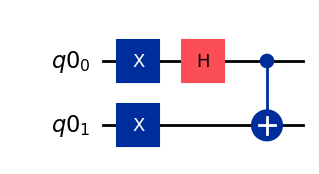

In [5]:
#|Psi> = (|01>-|10>)/sqrt(2)
QR_ab = QuantumRegister(2)
CR_AB = ClassicalRegister(2)
QR_E = QuantumRegister(2)
CR_E = ClassicalRegister(2)
Psi = QuantumCircuit(QR_ab)
Psi.x(QR_ab[0])
Psi.x(QR_ab[1])
Psi.h(QR_ab[0])
Psi.cx(QR_ab[0],QR_ab[1])
Psi.draw('mpl')

<h3> d) Measurement bases encoded with quantum gates </h3>

In [6]:
N = 2000
Ange_basis = ['X','W','Z']
Bill_basis = ['W','Z','V']
Ange_basis_choices = [random.choice(Ange_basis) for _ in range(N)] 
Bill_basis_choices = [random.choice(Bill_basis) for _ in range(N)] 

In [7]:
print('Ange_basis_choices =', Ange_basis_choices)
print('Bill_basis_choices = ', Bill_basis_choices)

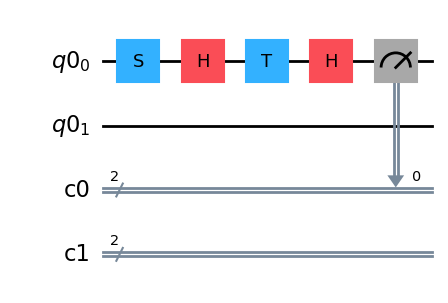

In [8]:
def Measurement_basis_circ(Ange_basis_choices,Bill_basis_choices):
    Ange_X = QuantumCircuit(QR_ab,CR_AB,CR_E)
    Ange_X.h(QR_ab[0])
    Ange_X.measure(QR_ab[0],CR_AB[0])
    
    # Ange_basis = {X, W, Z}
    #  Ange's qubit onto the W basis
    Ange_W = QuantumCircuit(QR_ab,CR_AB,CR_E)
    Ange_W.s(QR_ab[0])
    Ange_W.h(QR_ab[0])
    Ange_W.t(QR_ab[0])
    Ange_W.h(QR_ab[0])
    Ange_W.measure(QR_ab[0],CR_AB[0])

    # Ange's qubit onto the Z basis
    Ange_Z = QuantumCircuit(QR_ab,CR_AB,CR_E)
    Ange_Z.measure(QR_ab[0],CR_AB[0])
    
    # Bill_basis = {W, Z, V}
    # Bill's qubit onto the W basis
    Bill_W = QuantumCircuit(QR_ab,CR_AB,CR_E)
    Bill_W.s(QR_ab[1])
    Bill_W.h(QR_ab[1])
    Bill_W.t(QR_ab[1])
    Bill_W.h(QR_ab[1])
    Bill_W.measure(QR_ab[1],CR_AB[1])

    # Bill's qubit onto the Z basis
    Bill_Z = QuantumCircuit(QR_ab,CR_AB,CR_E)
    Bill_Z.measure(QR_ab[1],CR_AB[1])
    
    # Bill's qubit onto the V basis
    Bill_V = QuantumCircuit(QR_ab,CR_AB,CR_E)
    Bill_V.s(QR_ab[1])
    Bill_V.h(QR_ab[1])
    Bill_V.tdg(QR_ab[1])
    Bill_V.h(QR_ab[1])
    Bill_V.measure(QR_ab[1],CR_AB[1])
    
    ## Lists of Ange and Bill measurement circuits
    Ange_meas_circs = [Ange_X, Ange_W, Ange_Z]
    Bill_meas_circs = [Bill_W, Bill_Z, Bill_V]
    return Ange_meas_circs,Bill_meas_circs
Ange_meas_circs = Measurement_basis_circ(Ange_basis_choices,Bill_basis_choices)[0]
Bill_meas_circs = Measurement_basis_circ(Ange_basis_choices,Bill_basis_choices)[1]
Ange_meas_circs[1].draw('mpl')

In the following cell, we combine the entangled qubit device with Ange's and Bill's detectors, i.e. qubits state + Ange measurment + Bill measurement.

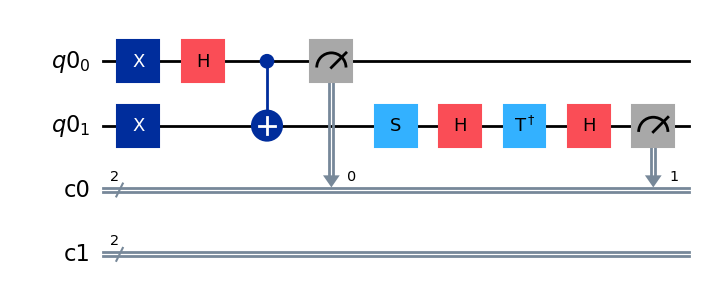

In [9]:
def measurement_cicuit(Ange_meas_circs,Bill_meas_circs,Ange_basis_choices,Bill_basis_choices):
    circuits = [] 
    
    for k in range(N):
        if Ange_basis_choices[k] == 'X':
            if Bill_basis_choices[k] == 'W':
                circ = Psi & Ange_meas_circs[0] & Bill_meas_circs[0] 
                circuits.append(circ)
            elif Bill_basis_choices[k] == 'Z':
                circ = Psi & Ange_meas_circs[0] & Bill_meas_circs[1] 
                circuits.append(circ)
            elif Bill_basis_choices[k] == 'V':
                circ = Psi & Ange_meas_circs[0] & Bill_meas_circs[2] 
                circuits.append(circ)
        elif Ange_basis_choices[k] == 'W':
            if Bill_basis_choices[k] == 'W':
                circ = Psi & Ange_meas_circs[1] & Bill_meas_circs[0] 
                circuits.append(circ)
            elif Bill_basis_choices[k] == 'Z':
                circ = Psi & Ange_meas_circs[1] & Bill_meas_circs[1] 
                circuits.append(circ)
            elif Bill_basis_choices[k] == 'V':
                circ = Psi & Ange_meas_circs[1] & Bill_meas_circs[2] 
                circuits.append(circ)
        elif Ange_basis_choices[k] == 'Z':
            if Bill_basis_choices[k] == 'W':
                circ = Psi & Ange_meas_circs[2] & Bill_meas_circs[0] 
                circuits.append(circ)
            elif Bill_basis_choices[k] == 'Z':
                circ = Psi & Ange_meas_circs[2] & Bill_meas_circs[1] 
                circuits.append(circ)
            elif Bill_basis_choices[k] == 'V':
                circ = Psi & Ange_meas_circs[2] & Bill_meas_circs[2] 
                circuits.append(circ)
    return circuits
circuits = measurement_cicuit(Ange_meas_circs,Bill_meas_circs,Ange_basis_choices,Bill_basis_choices)
circuits[0].draw('mpl')

In the cell bellow, we create a list  that contains the indices of the qubit-pairs with given two-qubit errors. Since our plan is to study noise effects on secure key rate, those qubit-pairs are selected such that the two-qubit error (2Q-error) is ranged from the minimum to the maximum as determined by the corresponding quantum hardware (see section 3.1. a). Here we select 29 qubit-pairs from the ibm-Fez  quantum hardware, with 2Q error ranged between $2.14\times 10^{-3}$ and 1, to run our experiment.   

In [10]:
layout_list = list(Qubit_pairs_list.values())

For each qubit-pair, we run the experiment 2000 times in the ibm-Fez quantum hardware as shown in the following cell.

In [ ]:
def Simulation(backend,layout_list,circuits):
    All_result = []
    for j in range(len(layout_list)):
        pmv = generate_preset_pass_manager(
            optimization_level = 1, 
            backend=backend, 
            seed_transpiler = 1234,
            initial_layout = list(layout_list[j])
        )
    
        Result = []
        for k in range(N):
            qc = circuits[k]
            qct = pmv.run(qc)
            result = backend.run(qct, shots = 1).result() 
        
            res = result.get_counts()
            # print(res)
            Result.append(res)
        All_result.append(Result)
    return All_result
All_result = Simulation(backend,layout_list,circuits)
All_result

In [12]:
All_Ange_key = []
All_Bill_key = []

for j in range(len(layout_list)):
    Ange_key = ''
    Bill_key = ''
    for k in range(N):
        key = list(All_result[j][k].keys())
        if key[0][4] == '1':
            Ange_key += '1'
        elif key[0][4] == '0':
            Ange_key += '0'
        if key[0][3] == '1':
            Bill_key += '1'
        elif key[0][3] == '0':
            Bill_key += '0'
    All_Ange_key.append(Ange_key)
    All_Bill_key.append(Bill_key)

All_Ange_key[0]

'001110100111110111000110110010011101111011101110000001101000001001001001001101011000101010111001111011011110001010110011110010101001011011001010111110010100101011011010010001101100101100101110010001011110010100100111010000001101111001111011011011101110011101111110100000000000100110000101011000110100010010001101001000011010011110011100110010011110100000100000001111111100000010000100001100111011101001100011100110010001010110000111001110001101011101001100010100100011011011100111000010001001010011100011001011000110100101111110001101011110101001010001001101010001100111001100101110101011101100111100101101010101110001010110111001001001010010110101100000100001000001000111111010001100000101101100100011111000011010110101111011110100010000110001001100110111110100000000001011001110000001101111010111001011100110101001001001001000111111110101010001001101100011001100000110111110011111010101000011100011111011100000011010101010001011101100111000111001001001100101101000000001011011110100001110110010111

In [13]:
All_Bill_key[0]

'110000111110001001101001001000110011011101011111101100010101110110000000011010100111000101000110110001100011110011000000011100010100100110010100011000101001010100110111111110010110010111111011111111000010001011111101011011100010100101001100100100100001100010001110010111111101001000011011110111001111101001110010100011000100100001001011001111100101011101101010111010000111111101111100110011110100010100111100000001001100000010011010001011110010100011110011111110011110100100011000111110010110101100001100110111001111100010100000111011000011010101101111110010100011010101110011110001100100010011000011010010001010001110101001000111100010111110001000001111111110110110001000000111110010100111010111010100000110000001001101010110011011100101001111111011100000101001000101111100110010011010000011101100111100011011010100110011111101110100001000111110110101011000110010110011100100100000000111111100011110000100011111110101000101110000010101000111001111101110011011110111111000001100011010110000001010010

<h3> e) Measurement bases reconcilliation </h3>

Here both legitimate users called each other and communicate their respective measurment basis through a classical channel. This step as explained in the algorithm section helps to discart the bits that measurement basis do not coincide.

In [14]:
All_Bill_key[0][-2] 

'0'

In [15]:
All_Ange_Key_final1 = [] 
All_Bill_Key_final1 = [] 

for j in range(len(layout_list)):
    Ange_Key_final1 = ''
    Bill_Key_final1 = ''
    
    for i in range(N):
        if Ange_basis_choices[i] == Bill_basis_choices[i]:
            Ange_Key_final1 += All_Ange_key[j][i] 
            Bill_Key_final1 += str((int(All_Bill_key[j][i])+1)%2) 
    
    All_Ange_Key_final1.append(Ange_Key_final1)
    All_Bill_Key_final1.append(Bill_Key_final1)
    
key_Length = [len(All_Ange_Key_final1[j]) for j in range(len(layout_list))]
print(All_Bill_Key_final1[0])
print(All_Ange_Key_final1[0])
print(key_Length)

0111011000000111100111101111111001101011001000101000001011011010001001001010110000111110000000011001001100001111011011001100111010011111000001001000110100001100011001101100010011111001111010111001001101100101000001010000000110001100001000111011101101001101101110001110011011011101010001010111111111100101111011010111000000111010100001101101110100001001101110011010111011111011010101100101000101111000010101110000111111001010000001001000010101010001000110111010000000010001110100011001
0111011000000101100111101111111001101011001000101000001011011000001001001010010000111110000000011001001100001111011011001100111010011111000001001000110100001100011001101100010011111001111010111001001101100101000101010000000110001100001000111011101101001101101110001110011011011101000001010111111111100101111011010111000000111010100001101101110100001001101110001010111011111011010100100101000101111000010101110000111111001010000001001000010101010001000110111010000000010001110100011001
[484, 484, 484, 484, 484, 484,

In the cell below we compute the number of mismatching bits. It is important to recall that since there is background noise, the key bit of the two parties might slighly differ eventhough they select the same measurement basis. In that situation we can easily have bit-flip error. This step normally help to determine the quantum bit error rate. In real life situation the two parties should sacrify half of their respective bits strings.

In [16]:
All_AB_numb_non_matching_bits = []

for k in range(len(layout_list)):
    AB_numb_non_matching_bits = 0 
    
    for j in range(key_Length[0]):
        if All_Ange_Key_final1[k][j] != All_Bill_Key_final1[k][j]:
            AB_numb_non_matching_bits += 1
    All_AB_numb_non_matching_bits.append(AB_numb_non_matching_bits)
QBER = [All_AB_numb_non_matching_bits[k]/key_Length[k] for k in range(len(layout_list))]

print('QBER = ', QBER)

QBER =  [0.014462809917355372, 0.028925619834710745, 0.03305785123966942, 0.045454545454545456, 0.01859504132231405, 0.024793388429752067, 0.030991735537190084, 0.01859504132231405, 0.012396694214876033, 0.03305785123966942, 0.024793388429752067, 0.030991735537190084, 0.14256198347107438, 0.0371900826446281, 0.06818181818181818, 0.026859504132231406, 0.01652892561983471, 0.1115702479338843, 0.01652892561983471, 0.01859504132231405, 0.01652892561983471, 0.08264462809917356, 0.028925619834710745, 0.028925619834710745, 0.01859504132231405, 0.028925619834710745, 0.05991735537190083, 0.08884297520661157, 0.506198347107438]


<h3> f) CHSH inequality</h3>

As previously stated, here we compute the CHSH inequality, which should help to find out if the secure key is compromised.

In [17]:

def chsh_correlation(result):
    #Below are the list of result counts
    #Each element of the list in the right hand side is the count of (-1,-1), (-1,1),(1,-1) and (1,1) respectively
    
    counter_Ange_X_Bill_W = np.zeros(4) #XW observable
    counter_Ange_X_Bill_V = np.zeros(4) #XV observable
    counter_Ange_Z_Bill_W = np.zeros(4) #ZW observable
    counter_Ange_Z_Bill_V = np.zeros(4) #ZV observable

    for k in range(N):

        res = list(result[k].keys())[0]

        if (Ange_basis_choices[k] == 'X' and Bill_basis_choices[k] == 'W'):
            if res.endswith('11'):
                counter_Ange_X_Bill_W[0] +=  1
            elif res.endswith('10'):
                counter_Ange_X_Bill_W[1] +=  1
            elif res.endswith('01'):
                counter_Ange_X_Bill_W[2] +=  1
            elif res.endswith('00'):
                counter_Ange_X_Bill_W[3] +=  1
            

        elif (Ange_basis_choices[k] == 'X' and Bill_basis_choices[k] == 'V'):
            if res.endswith('11'):
                counter_Ange_X_Bill_V[0] +=  1
            elif res.endswith('10'):
                counter_Ange_X_Bill_V[1] +=  1
            elif res.endswith('01'):
                counter_Ange_X_Bill_V[2] +=  1
            elif res.endswith('00'):
                counter_Ange_X_Bill_V[3] +=  1

        if (Ange_basis_choices[k] == 'Z' and Bill_basis_choices[k] == 'W'):
            if res.endswith('11'):
                counter_Ange_Z_Bill_W[0] +=  1
            elif res.endswith('10'):
                counter_Ange_Z_Bill_W[1] +=  1
            elif res.endswith('01'):
                counter_Ange_Z_Bill_W[2] +=  1
            elif res.endswith('00'):
                counter_Ange_Z_Bill_W[3] +=  1

        if (Ange_basis_choices[k] == 'Z' and Bill_basis_choices[k] == 'V'):
            if res.endswith('11') == True:
                counter_Ange_Z_Bill_V[0] +=  1
            elif res.endswith('10') == True:
                counter_Ange_Z_Bill_V[1] +=  1
            elif res.endswith('01') == True:
                counter_Ange_Z_Bill_V[2] +=  1
            elif res.endswith('00') == True:
                counter_Ange_Z_Bill_V[3] +=  1
                    
    Numb_XW = sum(counter_Ange_X_Bill_W)
    Numb_XV = sum(counter_Ange_X_Bill_V)
    Numb_ZW = sum(counter_Ange_Z_Bill_W)
    Numb_ZV = sum(counter_Ange_Z_Bill_V)      
                    
    expect_XW = (counter_Ange_X_Bill_W[0] - counter_Ange_X_Bill_W[1] 
                 - counter_Ange_X_Bill_W[2] + counter_Ange_X_Bill_W[3])/Numb_XW 
    
    expect_XV = (counter_Ange_X_Bill_V[0] - counter_Ange_X_Bill_V[1] 
                 - counter_Ange_X_Bill_V[2] + counter_Ange_X_Bill_V[3])/Numb_XV 
    
    expect_ZW = (counter_Ange_Z_Bill_W[0] - counter_Ange_Z_Bill_W[1] 
                 - counter_Ange_Z_Bill_W[2] + counter_Ange_Z_Bill_W[3])/Numb_ZW 
    
    expect_ZV = (counter_Ange_Z_Bill_V[0] - counter_Ange_Z_Bill_V[1] 
                 - counter_Ange_Z_Bill_V[2] + counter_Ange_Z_Bill_V[3])/Numb_ZV 
    
    correlation = expect_XW - expect_XV + expect_ZW + expect_ZV
    
    return correlation

In [18]:
# we want to compute the CHSH for each of the 29 qubit-pairs.
All_CHSH  = []

for k in range(len(layout_list)):
    CHSH = chsh_correlation(All_result[k])
    All_CHSH.append(CHSH )
All_CHSH

[-2.838589523037018,
 -2.684600645501625,
 -2.520756402142813,
 -2.6263825573565387,
 -2.589249578025394,
 -2.777668301624126,
 -2.664922788573503,
 -2.72798213080362,
 -2.8888820731898037,
 -2.6285659183893415,
 -2.6039721525121164,
 -2.5490753752393482,
 -2.038472123745725,
 -2.62756723840208,
 -2.5643732451488113,
 -2.615630231127829,
 -2.736540813027367,
 -2.2233599307661827,
 -2.6467959587676315,
 -2.6615893471973835,
 -2.7222121760438354,
 -2.3160818391691294,
 -2.771902341746355,
 -2.6998433487645443,
 -2.5839151383339316,
 -2.5185040746986216,
 -2.6599638434816573,
 -2.53757936890588,
 0.24342778703794488]

Text(0, 0.5, 'QBER')

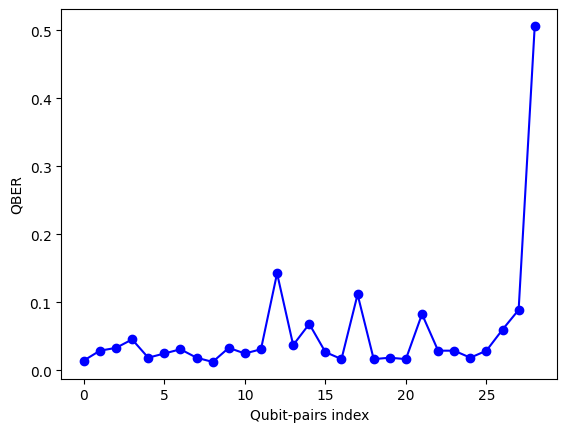

In [19]:
ax = plt.subplot(111)
ax.plot(list(range(len(layout_list))), QBER, 'b')
ax.scatter(list(range(len(layout_list))), QBER, color = 'blue')
plt.xlabel('Qubit-pairs index')
plt.ylabel('QBER')

#

<h3> 3.2. Simulation on real conditions: real quantum hardware and eavesdroper interference</h3>

In this section,we repeat the above steps but now we consider that there is Eve in the middle who is able to intercept the exchanged qubit-pairs, perform measurement on them, prepare another qubit-pairs depending on her measurement outcome and redistributes to Ange and Bill. This procedure is known as the intercept-and-resend attack. The question is, how does Eve's interference affect the correlation of Ange and Bill results? Would the legitimate parties be able to detect the presence of Eve if she prepared the qubits to be redistributed in the exact state as the ones she received? 

<h3> a) Eve's Measurement bases encoded with quantum gates </h3>
Here we assume that Eve measures Ange's and Bill's qubits simultaneously in W  for Ange's and Z for Bill's or in Z for Ange's and W for Bill's qubits.

In [ ]:
Eve_basis_choices = []# {[W,Z],[W,Z]}

for j in range(N):      
    if random.uniform(0, 1) <= 0.5: # We uniformly generate [W,W] and [Z,Z] with equal probabilities
        Eve_basis_choices.append(['W', 'W'])
    else: 
        Eve_basis_choices.append(['Z', 'Z'])
print(Eve_basis_choices)

In [21]:
def eavesdroper_meas_circ(Eve_basis_choices):
    # Eve measure Ange's qubit in W basis
    Eve_Ange_W = QuantumCircuit(QR_E,CR_AB,CR_E)
    Eve_Ange_W.s(QR_E[0])
    Eve_Ange_W.h(QR_E[0])
    Eve_Ange_W.t(QR_E[0])
    Eve_Ange_W.h(QR_E[0])
    Eve_Ange_W.measure(QR_E[0],CR_E[0])

    # Eve measure Ange's qubit in Z basis
    Eve_Ange_Z = QuantumCircuit(QR_E,CR_AB,CR_E)
    Eve_Ange_Z.measure(QR_E[0],CR_E[0])

    # Eve measure Bill's qubit in W basis
    Eve_Bill_W = QuantumCircuit(QR_E,CR_AB,CR_E)
    Eve_Bill_W.s(QR_E[1])
    Eve_Bill_W.h(QR_E[1])
    Eve_Bill_W.t(QR_E[1])
    Eve_Bill_W.h(QR_E[1])
    Eve_Bill_W.measure(QR_E[1],CR_E[1])

    # Eve measure Bill's qubit in Z basis
    Eve_Bill_Z = QuantumCircuit(QR_E,CR_AB,CR_E)
    Eve_Bill_Z.measure(QR_E[1],CR_E[1])

    return [Eve_Ange_W,  Eve_Bill_W, Eve_Ange_Z, Eve_Bill_Z ]

Eve_meas_circs = eavesdroper_meas_circ(Eve_basis_choices)

In the following cell, we combine the entangled qubit device with Ange's and Bill's detectors, i.e. qubits state + Eve measurment + Ange measurment + Bill measurement.

In [22]:
def Eve_measurement_circ(Eve_meas_circs):
    circuits_EAB = [] 
    
    for k in range(N):
    
        if Eve_basis_choices[k] == ['W','W'] :
            if Ange_basis_choices[k] == 'X':
                if Bill_basis_choices[k] == 'W':
                    circ = Psi & Eve_meas_circs[0] & Eve_meas_circs[1] & Ange_meas_circs[0] & Bill_meas_circs[0]
                    circuits_EAB.append(circ)
                elif Bill_basis_choices[k] == 'Z':
                    circ = Psi & Eve_meas_circs[0] & Eve_meas_circs[1] & Ange_meas_circs[0] & Bill_meas_circs[1] 
                    circuits_EAB.append(circ)
                elif Bill_basis_choices[k] == 'V':
                    circ = Psi & Eve_meas_circs[0] & Eve_meas_circs[1] & Ange_meas_circs[0] & Bill_meas_circs[2] 
                    circuits_EAB.append(circ)
            elif Ange_basis_choices[k] == 'W':
                if Bill_basis_choices[k] == 'W':
                    circ = Psi & Eve_meas_circs[0] & Eve_meas_circs[1] & Ange_meas_circs[1] & Bill_meas_circs[0] 
                    circuits_EAB.append(circ)
                elif Bill_basis_choices[k] == 'Z':
                    circ = Psi & Eve_meas_circs[0] & Eve_meas_circs[1] & Ange_meas_circs[1] & Bill_meas_circs[1] 
                    circuits_EAB.append(circ)
                elif Bill_basis_choices[k] == 'V':
                    circ = Psi & Eve_meas_circs[0] & Eve_meas_circs[1] & Ange_meas_circs[1] & Bill_meas_circs[2] 
                    circuits_EAB.append(circ)
            elif Ange_basis_choices[k] == 'Z':
                if Bill_basis_choices[k] == 'W':
                    circ = Psi & Eve_meas_circs[0] & Eve_meas_circs[1] & Ange_meas_circs[2] & Bill_meas_circs[0] 
                    circuits_EAB.append(circ)
                elif Bill_basis_choices[k] == 'Z':
                    circ = Psi & Eve_meas_circs[0] & Eve_meas_circs[1] & Ange_meas_circs[2] & Bill_meas_circs[1] 
                    circuits_EAB.append(circ)
                elif Bill_basis_choices[k] == 'V':
                    circ = Psi & Eve_meas_circs[0] & Eve_meas_circs[1] & Ange_meas_circs[2] & Bill_meas_circs[2] 
                    circuits_EAB.append(circ)

        elif Eve_basis_choices[k] == ['Z','Z'] :
            if Ange_basis_choices[k] == 'X':
                if Bill_basis_choices[k] == 'W':
                    circ = Psi & Eve_meas_circs[2] & Eve_meas_circs[3] & Ange_meas_circs[0] & Bill_meas_circs[0]
                    circuits_EAB.append(circ)
                elif Bill_basis_choices[k] == 'Z':
                    circ = Psi & Eve_meas_circs[2] & Eve_meas_circs[3] & Ange_meas_circs[0] & Bill_meas_circs[1] 
                    circuits_EAB.append(circ)
                elif Bill_basis_choices[k] == 'V':
                    circ = Psi & Eve_meas_circs[2] & Eve_meas_circs[3] & Ange_meas_circs[0] & Bill_meas_circs[2] 
                    circuits_EAB.append(circ)
            elif Ange_basis_choices[k] == 'W':
                if Bill_basis_choices[k] == 'W':
                    circ = Psi & Eve_meas_circs[2] & Eve_meas_circs[3] & Ange_meas_circs[1] & Bill_meas_circs[0] 
                    circuits_EAB.append(circ)
                elif Bill_basis_choices[k] == 'Z':
                    circ = Psi & Eve_meas_circs[2] & Eve_meas_circs[3] & Ange_meas_circs[1] & Bill_meas_circs[1] 
                    circuits_EAB.append(circ)
                elif Bill_basis_choices[k] == 'V':
                    circ = Psi & Eve_meas_circs[2] & Eve_meas_circs[3] & Ange_meas_circs[1] & Bill_meas_circs[2] 
                    circuits_EAB.append(circ)
            elif Ange_basis_choices[k] == 'Z':
                if Bill_basis_choices[k] == 'W':
                    circ = Psi & Eve_meas_circs[2] & Eve_meas_circs[3] & Ange_meas_circs[2] & Bill_meas_circs[0] 
                    circuits_EAB.append(circ)
                elif Bill_basis_choices[k] == 'Z':
                    circ = Psi & Eve_meas_circs[2] & Eve_meas_circs[3] & Ange_meas_circs[2] & Bill_meas_circs[1] 
                    circuits_EAB.append(circ)
                elif Bill_basis_choices[k] == 'V':
                    circ = Psi & Eve_meas_circs[2] & Eve_meas_circs[3] & Ange_meas_circs[2] & Bill_meas_circs[2] 
                    circuits_EAB.append(circ)
    return circuits_EAB
circuits_EAB = Eve_measurement_circ(Eve_meas_circs)

For each qubit-pair, we run the experiment 2000 times in the ibm-Fez quantum hardware as shown in the following cell.

In [ ]:
def simulation_EAB(circuits_EAB):
    All_result_EAB = []
    for j in range(len(layout_list)):
        pmv = generate_preset_pass_manager(
            optimization_level = 1, 
            backend=backend, 
            seed_transpiler = 1234,
            initial_layout = list(layout_list[j])
        )
        Result = []
        for k in range(N):
            qc = circuits_EAB[k]
            qct = pmv.run(qc)
            result = backend.run(qct, shots = 1).result() 
            res = result.get_counts()
            # print(res)
            Result.append(res)
        All_result_EAB.append(Result)
    return All_result_EAB
    
All_result_EAB = simulation_EAB(circuits_EAB)
All_result_EAB

In [ ]:
All_Ange_key = []
All_Bill_key = []
for j in range(len(layout_list)):
    Ange_key = ''
    Bill_key = ''
    for k in range(N):
        key = list(All_result_EAB[j][k].keys())
        if key[0][4] == '1':
            Ange_key += '1'
        elif key[0][4] == '0':
            Ange_key += '0'
        if key[0][3] == '1':
            Bill_key += '1'
        elif key[0][3] == '0':
            Bill_key += '0'
    All_Ange_key.append(Ange_key)
    All_Bill_key.append(Bill_key)

In [ ]:
print(All_Ange_key )
print(All_Bill_key)

In [ ]:
All_Eve_Keys = []
for j in range(len(layout_list)):
    Eve_Keys = []
    for k in range(N):
        key = list(All_result_EAB[j][k].keys())
        if key[0].startswith('00') == True:
            Eve_Keys.append('00')
        elif key[0].startswith('01'):
            Eve_Keys.append('01')
        elif key[0].startswith('10'):
            Eve_Keys.append('10')
        elif key[0].startswith('11'):
            Eve_Keys.append('11')
    All_Eve_Keys.append(Eve_Keys)
print(All_Eve_Keys)

<h3> b) Measurement bases reconcilliation over a classical channel under eavesdropper's control</h3>

Here both legitimate users call each other and communicate their respective measurment bases through a classical channel, which is listened by Eve. This step as explained in the algorithm section helps to discard the bits that measurement bases do not coincide. It thus help the eavesdropper to learn in which bases legitimate parties measured their qubits and also remove from her bits those that measurement bases do not coincide. 

In [ ]:
All_Ange_Key_final = []
All_Bill_Key_final = []
All_Eve_Key_final = [] 

for k in range(len(layout_list)):
    Ange_Key_final = ''
    Bill_Key_final = ''
    Eve_Key_final = [] 
    
    for j in range(N):
        if Ange_basis_choices[j] == Bill_basis_choices[j]:
    
            Ange_Key_final += All_Ange_key[k][j] 
            Bill_Key_final += str((int(All_Bill_key[k][j])+1)%2)
            Eve_Key_final.append([All_Eve_Keys[k][j][0], str((int(All_Eve_keys[k][j][1])+1)%2)]) 
    
    All_Ange_Key_final.append(Ange_Key_final)
    All_Bill_Key_final.append(Bill_Key_final)
    All_Eve_Key_final.append(Eve_Key_final)
    
keyLength = [len(All_Ange_Key_final[j]) for j in range(len(layout_list))] 

In [ ]:
print(All_Ange_Key_final)

In [ ]:
print(All_Bill_Key_final)

In [ ]:
print(All_Eve_Key_final)

<h3> c) Number of mismatching bit and Information known to eavesdropper</h3>
In this step, legitimate parties sacrify part of their respective bits to determine the QBER leaking additional information to eavesdropper. 

In [ ]:
All_AB_numb_non_matching_bits = [] #number of mismatching bits in Ange's and Bill's bit strings. 
All_EA_numb_matching_bits = []#number of matching bits in Eve's and Bill's bit strings.
All_EB_numb_matching_bits = []#number of matching bits in Eve's and Ange's bit strings.

for k in range(len(layout_list)):
    AB_numb_non_matching_bits = 0 
    EA_numb_matching_bits = 0 
    EB_numb_matching_bits = 0 
    
    for j in range(keyLength[k]):
        if All_Ange_Key_final[k][j] != All_Bill_Key_final[k][j]: 
            AB_numb_non_matching_bits += 1
        if All_Eve_Key_final[k][j][0] == All_Ange_Key_final[k][j]:
            EA_numb_matching_bits += 1
        if All_Eve_Key_final[k][j][1] == All_Bill_Key_final[k][j]:
            EB_numb_matching_bits += 1
    
    All_AB_numb_non_matching_bits.append(AB_numb_non_matching_bits)
    All_EA_Keymatches.append(EA_numb_matching_bits)
    All_EB_Keymatches.append(EB_numb_matching_bits)
print(All_AB_numb_non_matching_bits)
print(All_EA_numb_matching_bits)
print(All_EB_numb_matching_bits)

In [ ]:
QBER = [All_AB_numb_non_matching_bits[k]/key_Length[k] for k in range(len(layout_list))]

print('QBER = ', QBER)
EA_Knowledge = [((All_EA_numb_matching_bits[k])/key_Length[k]) for k in range(len(layout_list))]
EB_Knowledge = [((All_EB_numb_matching_bits[k])/key_Length[k]) for k in range(len(layout_list))]
print('Eve Knowledge from Ange's key  =', EA_Knowledge)
print('Eve Knowledge from Bill's key  =',EB_Knowledge)

<h3> d) CHSH inequality</h3>
As previously stated, here we compute the CHSH inequality, which should help to find out if the secure key is compromised.

In [ ]:
All_CHSH_EAB  = []

for k in range(len(layout_list)):
    CHSH = chsh_correlation(All_result_EAB[k])
    All_CHSH_EAB.append(CHSH )
All_CHSH_EAB


In [ ]:
ax = plt.subplot(111)
ax.plot(list(range(len(layout_list))), QBER, 'b', labels = 'QBER')
ax.scatter(list(range(len(layout_list))), QBER, color = 'blue')

ax.plot(list(range(len(layout_list))), EA_Knowledge, 'r', labels = 'Eve knowledge of sender  key')
ax.scatter(list(range(len(layout_list))), EA_Knowledge, color = 'red')

ax.plot(list(range(len(layout_list))), EB_Knowledge, 'g', labels = 'Eve knowledge of receiver key')
ax.scatter(list(range(len(layout_list))), EB_Knowledge, color = 'green')
plt.xlabel('Qubit-pairs index')

![Figure](./qkd_img.png)

<h1>4. Discussion</h1>

The main goal of this notebook was to simulate noise effects E91 QKD protocol QBER and discuss how to detect the eavesdropper by means of CHSH inequality on real quantum hardware.  This requires the execution of a sequence of two-qubit quantum circuits preparing Bell states. Here the Bell state prepared is the $\Psi^-$ state, containing three single qubit gates and one CNOT (two-qubit gate). This precision is important given the architecture of current quantum hardware, which are capable of providing the exact value of single and two-qubit gates, which should then help us to accurately model noise effects. In this case we employ the **IBM-Fez** quantum hardware, which has 156 qubits, with **Heron** type quantum processor([see](https://quantum.cloud.ibm.com/computers)). To simulate noise effects, we thus computed the single-qubit and two-qubit gates errors of the entire quantum hardware and classify the qubit pairs with respect to the two-qubit gate errors from the lowest to the highest. Here we only focused on two-qubit gate errors since they are 100 times higher than the two-single qubit gate errors. Therefore, we selected 29 qubit-pairs with direct connection and arranged them from the lowest CZ error (2.43 $\times 10^{-3}$ to the highest CZ error (approximately 1). Please note that these values are readout (using the python class function provided at the beginning of this notebook) directly from the IBM quantum platform and are dynamics, so, can change within time. 

We thus simulated our E91 QKD protocol in two different settings, namely with no eavesdropper interfering with the exchanged qubits on one hand and on the second hand with an eavesdropper in the middle who is able to intercept the exchanged qubit-pairs, measure and redistribute the qubits to legitimate parties (this process is known as the intercept-and-resend attack). In both situations, we computed the CHSH inequality and the QBER. For the first case, we have seen that most of the qubit-pairs remain entangled within the coherence time ($T_1$) despite the noise effects, since the correlations fall above the classical threshold limit in absolute value, violating  CHSH inequality, except the qubit-pair with the highest two-qubit gate error. In addition, the QBERs fall below the threshold limit of $5\%$, for most of the qubit-pairs, validating the protocol. However, we can observe that some qubit-pairs show QBER between $10\%$ and $15\%$, because those qubits present higher readout errors. An interesting observation here is that the qubit-pair with the highest two-qubit gate error has a QBER above $50\%$, which shows that if such noisy qubits are used to execute the protocol then it has  more than $50\%$ chance to fail, even though no unwanted third party interfered with the communication process. This is in agreement with our expectations.

Regarding the second case where there is a third party interfering with the exchanged qubit-pairs (i.e. who is able to perform the intercept-and-resend attack), the simulation shows that the correlation fall below the classical limit even for qubit-pair with the lowest two-qubit gate error. Moreover, the QBER are found to be all greater than the threshold limit of $5\%$ ( specifically between $10\%$ and $20\%$ for most qubit-pairs). In addition, the information rate learned by the eavesdropper is also subject to similar noise effects as shown by the red and green curves, representing the information rate learned by interfering with the sender's and receiver's qubits respectively. This is in agreement with our expectation in the sense that by interfering with the exchanged qubit-pairs the eavesdropper ends-up destroying entanglement. In this case, her presence is detected by legitimate parties given that the correlation does not break the classical limit.
